In [8]:
# 🧠🤖 Neurosymbolic vs Neural Network Demo: Loan Approval

"""
This notebook demonstrates the advantage of combining neural networks with symbolic rules (Neurosymbolic AI)
on a simple loan approval task.

- Neural network: Learns to predict loan approval from synthetic features.
- Symbolic logic: Enforces known ground-truth rules post-prediction.
- Neurosymbolic: Combines both for more robust decision-making.

Symbolic Rule (Ground Truth):
    Approve loan if income > 50K AND credit_score > 650 AND debt < 20K
"""

'\nThis notebook demonstrates the advantage of combining neural networks with symbolic rules (Neurosymbolic AI)\non a simple loan approval task.\n\n- Neural network: Learns to predict loan approval from synthetic features.\n- Symbolic logic: Enforces known ground-truth rules post-prediction.\n- Neurosymbolic: Combines both for more robust decision-making.\n\nSymbolic Rule (Ground Truth):\n    Approve loan if income > 50K AND credit_score > 650 AND debt < 20K\n'

In [9]:
# Step 1: Generate synthetic data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

np.random.seed(42)

N = 1000
data = {
    "age": np.random.randint(18, 65, N),
    "income": np.random.randint(20000, 120000, N),
    "debt": np.random.randint(0, 50000, N),
    "credit_score": np.random.randint(300, 850, N),
    "savings": np.random.randint(0, 80000, N),
    "years_employed": np.random.randint(0, 40, N)
}

df = pd.DataFrame(data)

In [10]:
# Ground-truth label based on symbolic rule
df["loan_approved"] = ((df["income"] > 50000) & 
                        (df["credit_score"] > 650) & 
                        (df["debt"] < 20000)).astype(int)

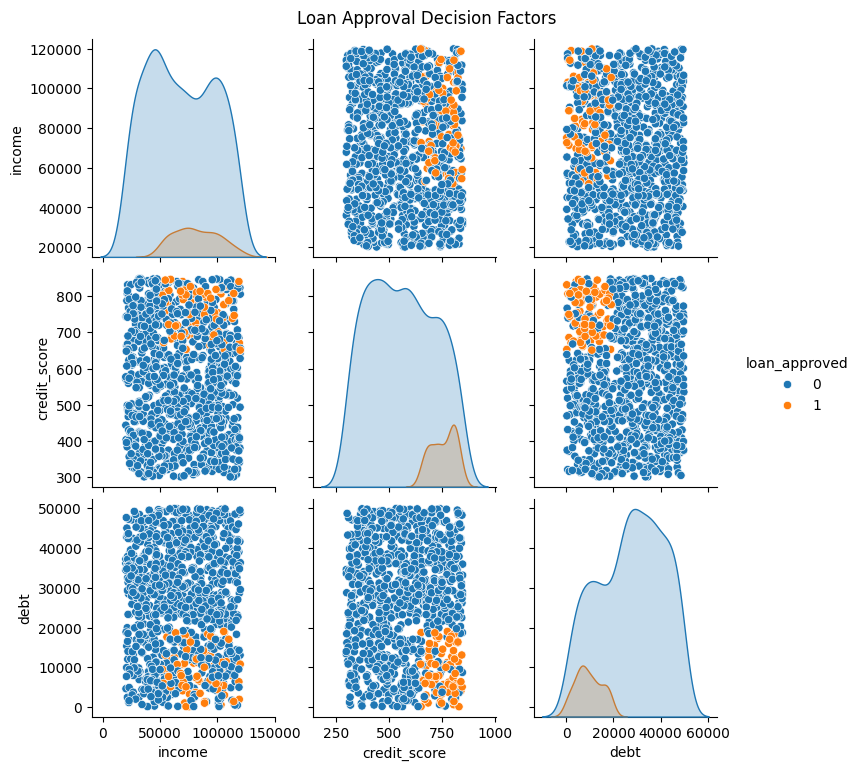

In [11]:
# Visualize the data
sns.pairplot(df[['income', 'credit_score', 'debt', 'loan_approved']], hue='loan_approved')
plt.suptitle("Loan Approval Decision Factors", y=1.02)
plt.show()

In [12]:
# Step 2: Train a pure neural network
X = df[["age", "income", "debt", "credit_score", "savings", "years_employed"]]
y = df["loan_approved"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = MLPClassifier(hidden_layer_sizes=(12, 6), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("\U0001F534 Neural-only accuracy:", accuracy_score(y_test, y_pred))

🔴 Neural-only accuracy: 0.905


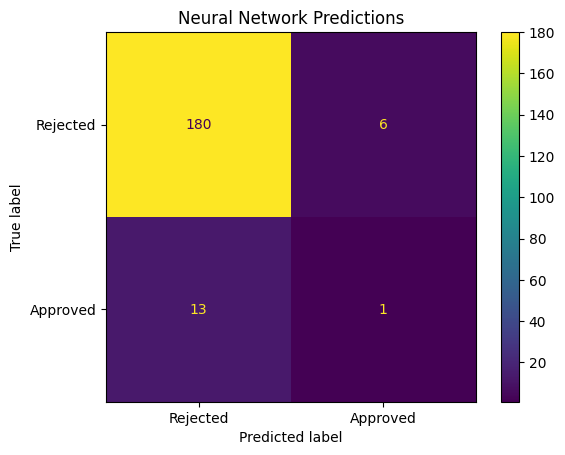

In [13]:
# Confusion matrix for neural-only model
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Rejected", "Approved"]).plot()
plt.title("Neural Network Predictions")
plt.show()

In [14]:
# Step 3: Define symbolic correction rules
def symbolic_correction(row, pred):
    if pred == 1:
        if not (row["income"] > 50000 and row["credit_score"] > 650 and row["debt"] < 20000):
            return 0  # override false positive - means rejected
    return pred

In [15]:
# Step 4: Apply neurosymbolic correction
df_test = X_test.copy()
df_test["y_true"] = y_test

df_test["y_pred"] = y_pred
df_test["y_neurosymbolic"] = df_test.apply(lambda row: symbolic_correction(row, row["y_pred"]), axis=1)

print("\U0001F9E0\U0001F916 Neurosymbolic accuracy:", accuracy_score(df_test["y_true"], df_test["y_neurosymbolic"]))


🧠🤖 Neurosymbolic accuracy: 0.935


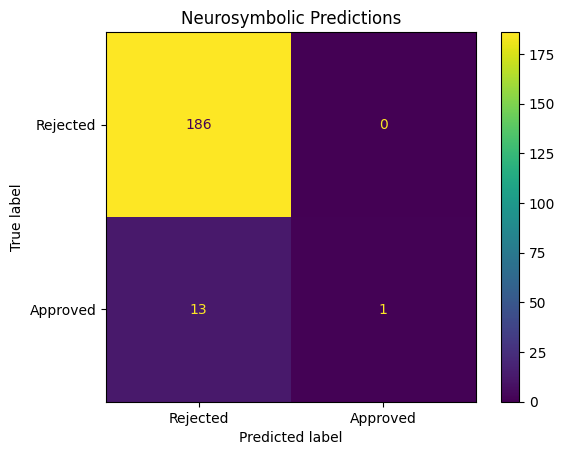

In [16]:
# Confusion matrix for neurosymbolic model
cm_ns = confusion_matrix(df_test["y_true"], df_test["y_neurosymbolic"])
ConfusionMatrixDisplay(cm_ns, display_labels=["Rejected", "Approved"]).plot()
plt.title("Neurosymbolic Predictions")
plt.show()


In [17]:
# Summary
print("\n\U0001F4CA Comparison:")
print("Neural-only accuracy:", accuracy_score(y_test, y_pred))
print("Neurosymbolic accuracy:", accuracy_score(df_test["y_true"], df_test["y_neurosymbolic"]))
print("\nNeurosymbolic AI corrects logical errors that neural nets make.")


📊 Comparison:
Neural-only accuracy: 0.905
Neurosymbolic accuracy: 0.935

Neurosymbolic AI corrects logical errors that neural nets make.
